In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating path
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [5]:
pleasant = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
climate = pd.read_csv(os.path.join(path, 'unscaled_cleaned_weather_dated.csv'), index_col = False)

In [9]:
# Reducing data set to Madrid station only
# Create a list of the columns containing "Madrid" in their names

madrid_list = list(x for x in climate.columns if x.find('MADRID') >=0)
madrid_list

['MADRID_cloud_cover',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max']

In [11]:
# Create a dataframe with those columns

df_madrid = climate[madrid_list]
df_madrid

,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max
0,6,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8
1,7,0.86,1.0254,0.46,0.00,0.9,9.8,7.4,12.2
2,5,0.90,1.0287,0.63,0.00,2.3,8.6,6.4,10.8
3,0,0.75,1.0281,1.16,0.00,8.7,10.3,4.5,16.1
4,2,0.64,1.0269,1.10,0.00,7.8,12.1,8.2,16.0
...,...,...,...,...,...,...,...,...,...
22945,8,0.52,1.0204,1.89,0.12,5.3,20.0,16.2,23.9
22946,8,0.51,1.0221,1.89,0.12,3.9,19.1,14.7,23.5
22947,8,0.46,1.0186,1.89,0.12,8.1,19.0,15.4,22.6
22948,5,0.66,1.0186,1.89,0.12,3.1,15.7,13.1,18.3


In [13]:
# Reducing pleasant dataset to Madrid station only

pleasant_madrid = pleasant['MADRID_pleasant_weather']
pleasant_madrid

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MADRID_pleasant_weather, Length: 22950, dtype: int64

In [15]:
# Checking dataset shapes
df_madrid.shape

(22950, 9)

In [17]:
pleasant_madrid.shape

(22950,)

In [19]:
# Reshaping for modeling

X = df_madrid

In [21]:
y = pleasant_madrid

In [23]:
# Turn X and y from df to arrays

X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(22950, 9)

In [27]:
y.shape

(22950,)

In [29]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [33]:
X_train

array([[ 4.    ,  0.48  ,  1.0139, ..., 24.8   , 19.    , 30.5   ],
       [ 5.    ,  0.7   ,  1.0192, ...,  5.8   ,  2.7   ,  8.8   ],
       [ 8.    ,  0.91  ,  1.0006, ...,  2.1   ,  0.6   ,  3.6   ],
       ...,
       [ 6.    ,  0.53  ,  1.0147, ..., 18.1   , 13.2   , 23.    ],
       [ 0.    ,  0.45  ,  1.0204, ..., 17.5   , 10.2   , 24.8   ],
       [ 6.    ,  0.74  ,  1.0155, ..., 13.4   ,  9.2   , 17.5   ]])

In [35]:
y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [37]:
X_test

array([[ 2.    ,  0.42  ,  1.0114, ..., 24.8   , 18.3   , 31.2   ],
       [ 6.    ,  0.78  ,  1.0086, ..., 12.3   ,  7.6   , 17.    ],
       [ 0.    ,  0.38  ,  1.0129, ..., 27.2   , 20.9   , 33.5   ],
       ...,
       [ 8.    ,  0.91  ,  1.0057, ..., 12.5   , 10.6   , 14.4   ],
       [ 0.    ,  0.48  ,  1.0165, ..., 14.4   ,  9.4   , 19.4   ],
       [ 8.    ,  0.64  ,  1.0178, ..., 20.6   , 17.6   , 23.5   ]])

In [39]:
y_test

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
# Creating Random Forest Model for Madrid
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


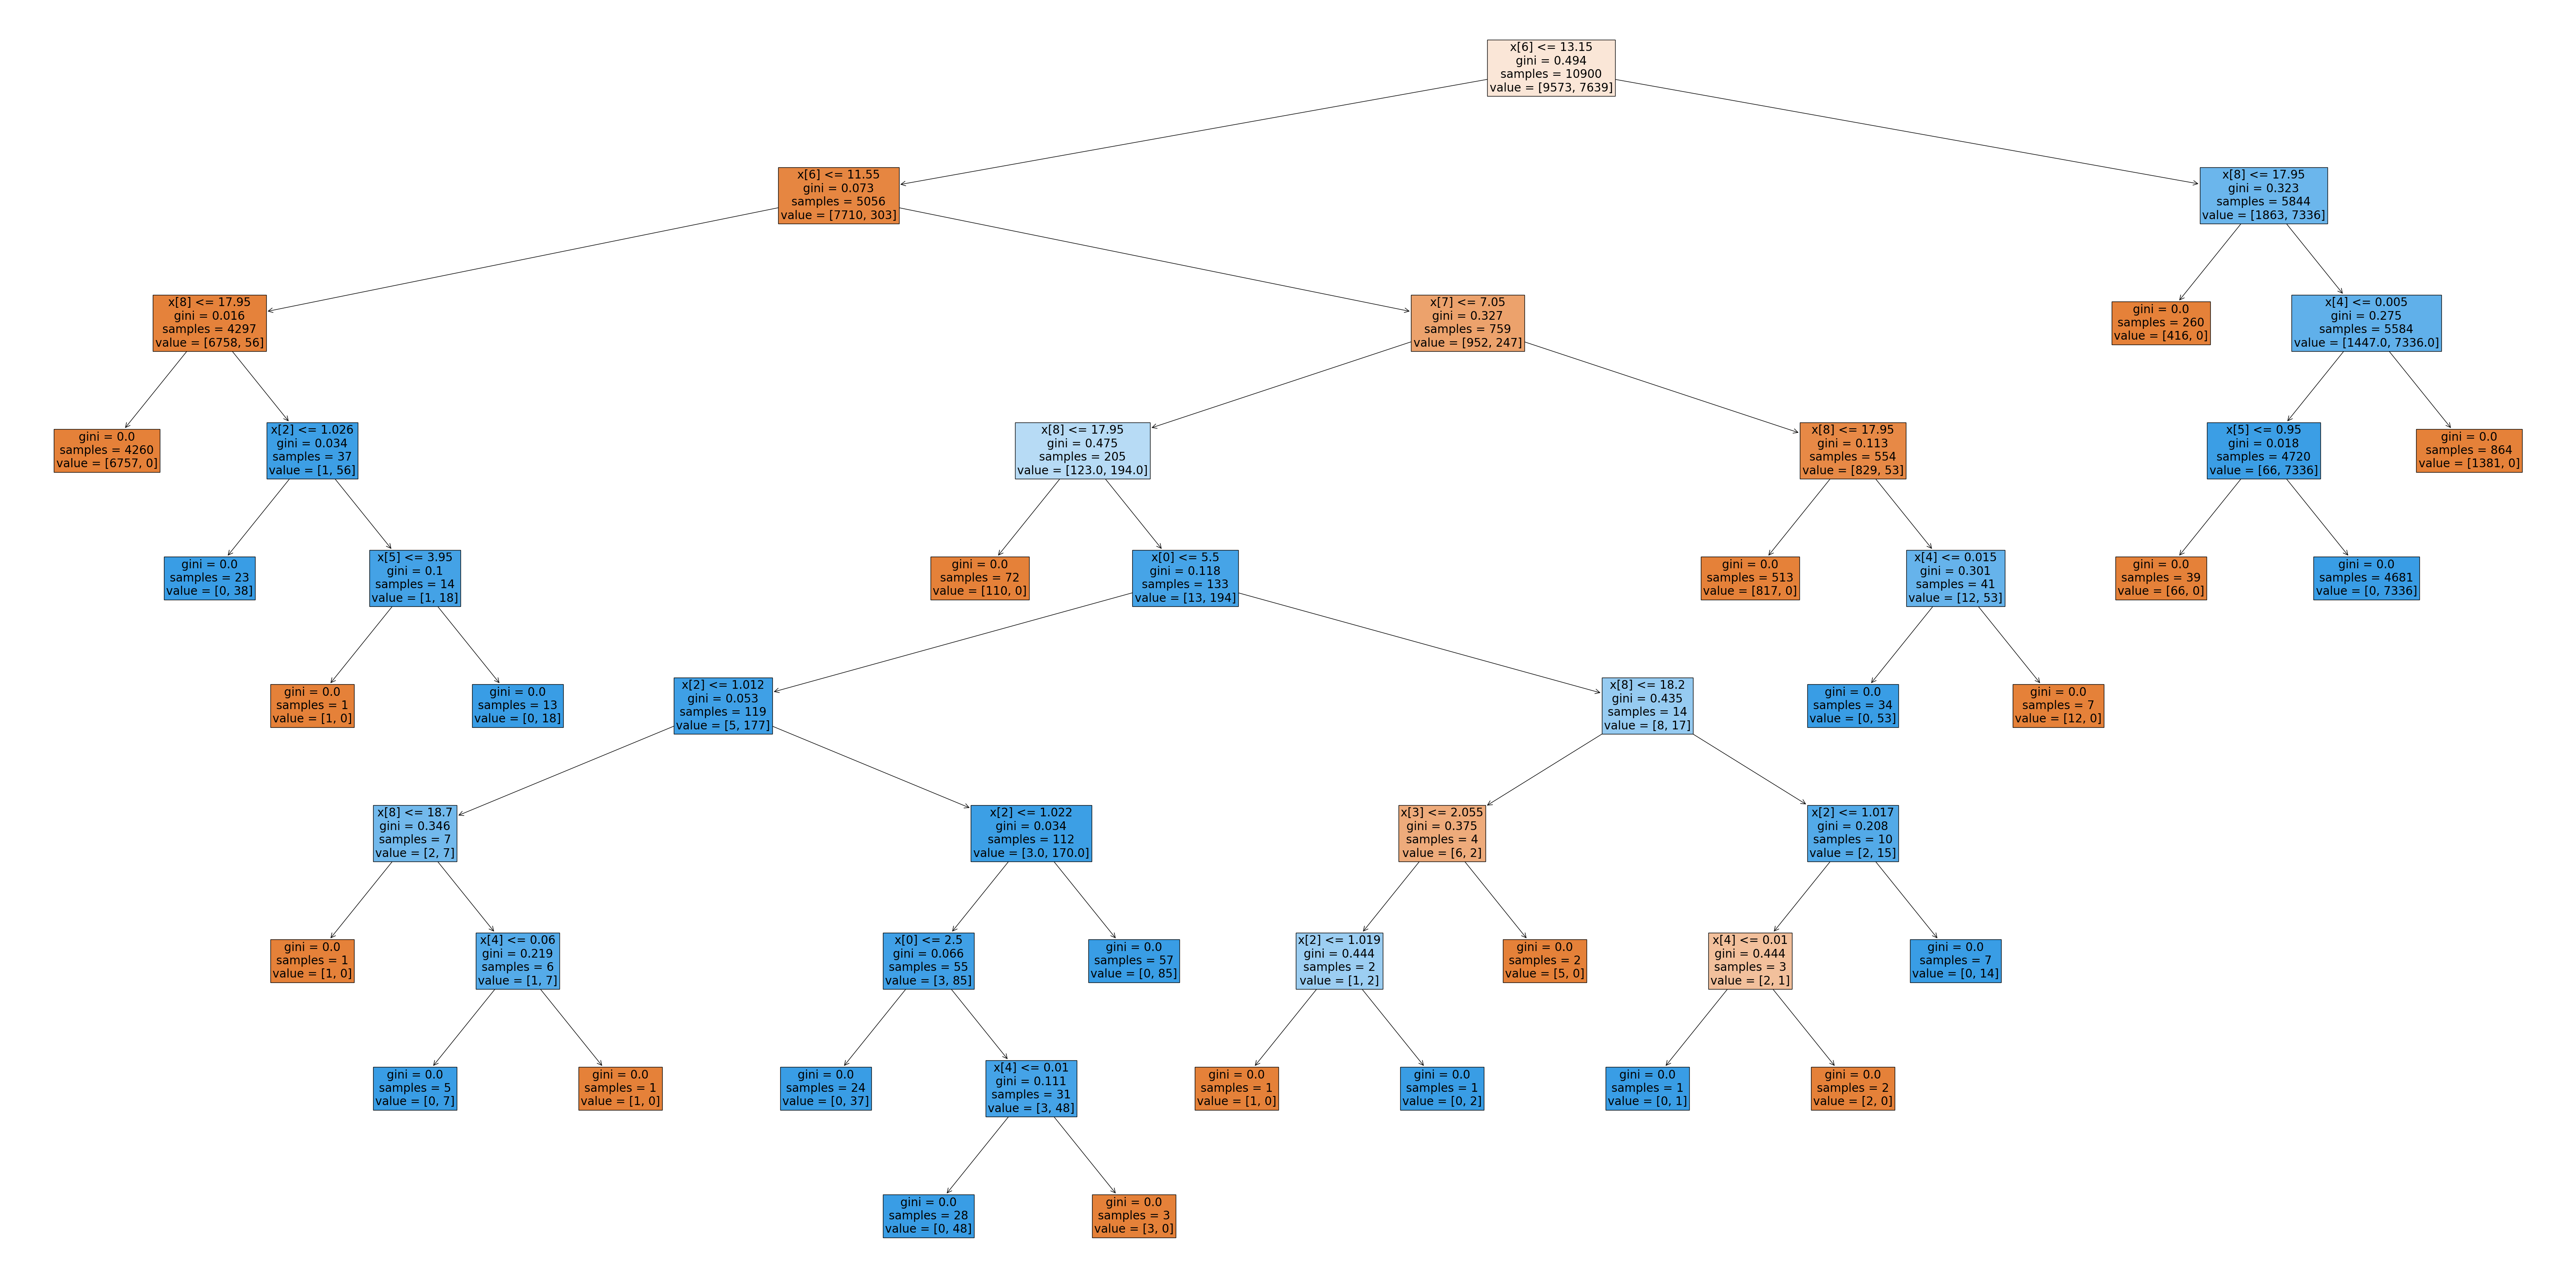

In [45]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[6], fontsize = 20, filled=True);

In [47]:
fig.savefig(os.path.join(path, 'Visualizations', 'random_forest_Madrid.png'),bbox_inches='tight')

In [49]:
# Discovering Feature Importances
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01091731, 0.01549429, 0.00508604, 0.08410436, 0.22095292,
       0.08700394, 0.19319572, 0.05619918, 0.32704625])

In [51]:
# Create a list of weather features

wx_list = [feature.replace('MADRID_', '') for feature in madrid_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [53]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.010917
humidity            0.015494
pressure            0.005086
global_radiation    0.084104
precipitation       0.220953
sunshine            0.087004
temp_mean           0.193196
temp_min            0.056199
temp_max            0.327046
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


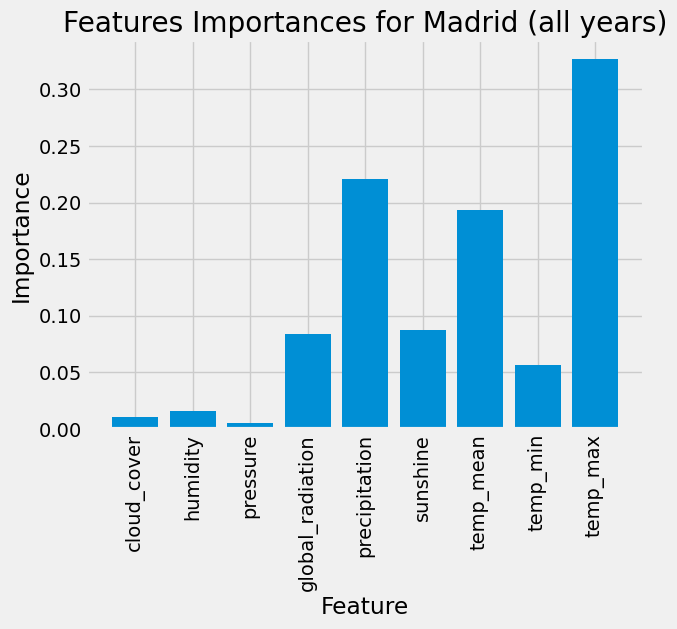

In [55]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Madrid (all years)');

plt.savefig(os.path.join(path, 'Visualizations', 'Madrid_feature_importances.png'), bbox_inches='tight')
plt.show()